#### Case Study #1

Below is a data set that represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals.
We would like you to perform the following using the language of your choice:

•	Describe the dataset and any issues with it.
•	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
•	Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
•	Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.


##### Description of the Dataset
The dataset represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Loasns are provided by the risk factor of various people, if a person is risky then the load rate is increased and the low risk individuals receive loans at a lower rate.

##### Following issues are observed in the dataset:
1. Several NaN or missing values
2. Outliers with extreme values in the data
3. Categorical data which needs to be transformed prior to modelling

##### Assumptions made are:
1. The empty fields of debt_to_income, annual_income_joint, verification_income_joint, debt_to_income_joint, emp_length are taken as zero since this may not exist.
2. The fields with empty titles are considered as Unemployed person entries
3. The empty fields of months_since_last_delinq, months_since_90d_late, months_since_last_credit_inquiry, num_accounts_120d_past_due are set to -1 because this data may not be filled. If they are set to zero then the calculation will go wrong as it may consider these individuals as those with the best records. Thus, -1 has been set to identify missing records and avoid NaN issues in the calculation
4. Fields with less correlation are dropped as they are considered less likely to contribute to the accuracy of the results

##### If time was not a constraint, the following could have been done:
1. More cleaning of data to find the best replacement for missing values such that default values like 0 and -1 could be avoided
2. More exploratory data analysis, for finding correlations between different combinations of attributes and graphing them for visual clarity
3. Further reducing the number of features by trying various combinations of the best features such that models produced even more accuracy
4. Trying more model types such as AdaBoostRegressor, SVM and training a neural network to find an even better model
5. Using GridSearchCV to find the best set of parameters from a wide range of selected parameters

##### Approach:
1. Data was decribed and viewed to find the null or Nan values
2. Data cleaning was done using the above assumptions steps
3. Exploratory Data analysis was done to find correlations between the fetaures to find the best features. Heatmaps and graphs are drawn
4. The unwanted field are dropped and the X and y fields are established. y is the target field which is the interest_rate
5. The categorical features are label encoded
6. The entire data is transformed to a uniform distribution to handle extreme variations in the values
7. Data is split into test and train data by 20:80 division
8. Model building is done using Random forest regressor with 500 estimators and max_depth of 7 with a min_sample_split of 2, we observe a 99.6% accuracy, 99.1% Explained variance score and 98.2% R2 Score. This model provides an extremely good result
9. Model building is done using XGBoost Regressor with 500 estimators and evaluation metric of root mean square error, we observe a 98.6% accuracy, 99.1% Explained variance score and 98.2% R2 Score. This model provides an extremely good result as well

##### Conclusion:
Thus we conclude that both the models employed here, Random Forest and XGBoost provide extremely good accuracies, explained variance scores and R2 scores. We have used explained variance scores and R2 scores because regression models have been used as the predictor variable is continuous and not discrete

## Start of the Python program for DDA Case Study 1


Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, accuracy_score

Read the loans_full_schema.csv file

In [2]:
df = pd.read_csv(r'C:/Users/Chrisia/OneDrive - stevens.edu/Documents/Resume/loans_full_schema.csv', sep=',')

Display of the given loans dataset

In [3]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#### Description of the Dataset
The dataset represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Loasns are provided by the risk factor of various people, if a person is risky then the load rate is increased and the low risk individuals receive loans at a lower rate.

#### Following issues are observed in the dataset:
    1. Several NaN or missing values
    2. Outliers with extreme values in the data
    3. Categorical data which needs to be transformed prior to modelling

In [4]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


### Data Cleaning

We notice multiple NaN/null fields where data has not been provided

In [5]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

##### Data Cleaning steps:
1. The empty fields of debt_to_income, annual_income_joint, verification_income_joint, debt_to_income_joint, emp_length are taken as zero since this may not exist.
2. The fields with empty titles are considered as Unemployed person entries
3. The empty fields of months_since_last_delinq, months_since_90d_late, months_since_last_credit_inquiry, num_accounts_120d_past_due are set to -1 because this data may not be filled. If they are set to zero then the calculation will go wrong as it may consider these individuals as those with the best records. Thus, -1 has been set to identify missing records and avoid NaN issues in the calculation

In [6]:
empty_fields = ['debt_to_income', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'emp_length']

for empty_field in empty_fields:
    df[empty_field] = df[empty_field].replace(np.nan, 0)

df['emp_title'] = df['emp_title'].replace(np.nan, "Unemployed")

empty_fields_other = ['months_since_last_delinq', 'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']

for empty_field in empty_fields_other:
    df[empty_field] = df[empty_field].replace(np.nan, -1)

We see that all null values are successfully taken care of

In [7]:
df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfac

### Exploratory Data Analysis

##### Heatmap of the correlations between each of the attributes

In [8]:
corr=df.corr()
# Correlation of interest_rate with the rest of the attributes
corr['interest_rate'].sort_values(ascending=False)

interest_rate                       1.000000
paid_interest                       0.514508
term                                0.358664
debt_to_income                      0.139813
inquiries_last_12m                  0.131193
accounts_opened_24m                 0.120657
earliest_credit_line                0.103635
debt_to_income_joint                0.100336
installment                         0.098811
delinq_2y                           0.090456
months_since_90d_late               0.087164
num_cc_carrying_balance             0.081741
months_since_last_delinq            0.070957
balance                             0.067570
paid_total                          0.065339
loan_amount                         0.064527
public_record_bankrupt              0.047477
current_installment_accounts        0.047131
num_historical_failed_to_pay        0.037563
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_active_debit_accounts           0.026800
paid_late_

In [9]:
plt.figure(figsize=(10, 5), dpi=1000)

sn.heatmap(corr, annot = False)
plt.title('Heatmap of the correlations between each of the attributes')
plt.show()

Observation: We observe that:
1. The interest_rate has a correlation of 0.514508 with paid_interest, 0.358664 with term, 0.139813 with debt_to_income, 0.131193 with inquiries_last_12m and 0.120657 with accounts_opened_24m 
2. The num_total_cc_accounts has a correlation of 0.773347 with total_credit_lines and correlation of 0.718405 with num_satisfactory_accounts

##### Graph for Average paid_interest of each interest_rate

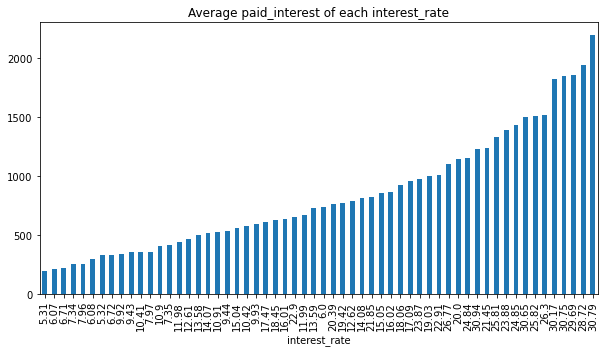

In [10]:
plt.figure(figsize=(10,5))
df.groupby('interest_rate')['paid_interest'].mean().sort_values().plot(kind='bar')
plt.title('Average paid_interest of each interest_rate')
plt.show()

In the above graph, we observe an increasing trend of paid_interest against interest_rate

##### Graph for Average interest_rate of each term

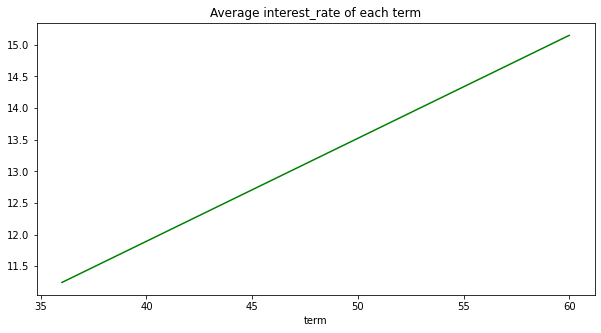

In [11]:
plt.figure(figsize=(10,5))
df.groupby('term')['interest_rate'].mean().sort_values().plot( color='g')
plt.title('Average interest_rate of each term')
plt.show()

In the above graph, we observe that the interest_rate increases with each term

##### Graph for interest_rate versus debt_to_income and inquiries_last_12m

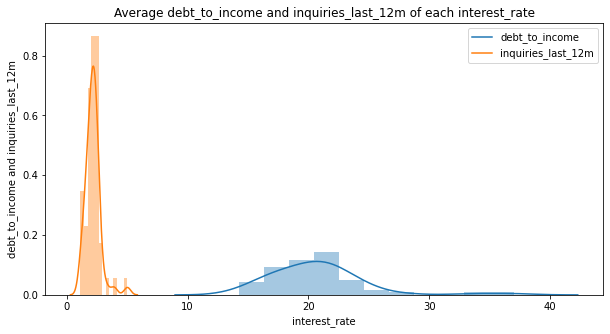

In [12]:
plt.figure(figsize=(10,5))
sn.distplot(df.groupby('interest_rate')['debt_to_income'].mean().sort_values())
sn.distplot(df.groupby('interest_rate')['inquiries_last_12m'].mean().sort_values())
plt.title('Average debt_to_income and inquiries_last_12m of each interest_rate')
plt.xlabel("interest_rate")
plt.ylabel("debt_to_income and inquiries_last_12m")
plt.legend(['debt_to_income', 'inquiries_last_12m'])
plt.show()

In the above graph, the values of inquiries_last_12m are concentrated at lower interest_rate and debt_to_income is concentrated around the mean of 20 interest_rate and is more spread out

##### Graph for Average total_credit_lines and num_satisfactory_accounts of each num_total_cc_accounts

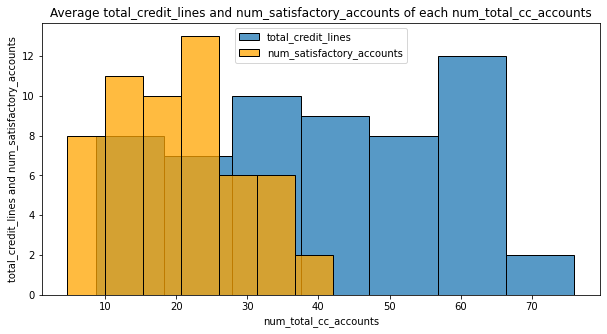

In [13]:
#The num_total_cc_accounts has a correlation of 0.773347 with total_credit_lines and correlation of 0.718405 with num_satisfactory_accounts

plt.figure(figsize=(10,5))
sn.histplot(df.groupby('num_total_cc_accounts')['total_credit_lines'].mean().sort_values())
sn.histplot(df.groupby('num_total_cc_accounts')['num_satisfactory_accounts'].mean().sort_values(), color='orange')
plt.title('Average total_credit_lines and num_satisfactory_accounts of each num_total_cc_accounts')
plt.xlabel("num_total_cc_accounts")
plt.ylabel("total_credit_lines and num_satisfactory_accounts")
plt.legend(['total_credit_lines', 'num_satisfactory_accounts'])
plt.show()


In the above grapgh, we clearly observe that the num_satisfactory_accounts are spread from 5 to 40 num_total_cc_accounts and total_credit_lines are spread from 10 to 70 num_total_cc_accounts

##### Picking important features from the dataset

Features that have low correlation are being dropped from the dataset in order for further processing to take place

In [14]:
featuresdrop = ['paid_principal','open_credit_lines','num_satisfactory_accounts','num_open_cc_accounts','emp_length',
'months_since_last_credit_inquiry','total_credit_lines','num_accounts_120d_past_due','num_total_cc_accounts',
'annual_income','account_never_delinq_percent','total_credit_limit','num_mort_accounts','total_debit_limit', 'verification_income_joint']

In [15]:
df.drop(featuresdrop, axis=1, inplace=True)

In [16]:
features = ['interest_rate','paid_interest', 'term', 'debt_to_income', 'inquiries_last_12m', 'accounts_opened_24m', 
            'num_total_cc_accounts','total_credit_lines', 'num_satisfactory_accounts']
newdataset = df

### Label Encoding and Standardization

In [17]:
X = newdataset.drop('interest_rate', axis=1)
y = newdataset['interest_rate']

Label Encoding the categorical features so that model building can be done

In [18]:
# Label Encoding the categorical data
le = LabelEncoder()
columns = ['emp_title','state', 'homeownership', 'verified_income', 'earliest_credit_line', 'loan_purpose',
           'application_type', 'grade','sub_grade','issue_month','loan_status','initial_listing_status',
           'disbursement_method', 'verified_income'] #, 'verification_income_joint'
for col in columns:
    X[col] = le.fit_transform(X[col])



Standardizing the features so that the data is distributed uniformly

In [19]:
X = StandardScaler().fit_transform(X)

splitting the data into train and test sets

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Building

#### Random Forest Regressor

Random Forest Regressor is run with 500 estimators and max_depth of 7 with a min_sample_split of 2

In [21]:
regr = RandomForestRegressor(n_estimators=500, max_depth = 7, random_state=21, min_samples_split = 2)
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

In [22]:
print('R2 Score: ', r2_score(y_test, np.floor(predictions)))
print('Explained variance score: ',explained_variance_score(y_test,np.floor(predictions)))
print('Accuracy score: ',accuracy_score(np.floor(y_test), np.floor(predictions)))

R2 Score:  0.9823653738309255
Explained variance score:  0.991890228324862
Accuracy score:  0.9965


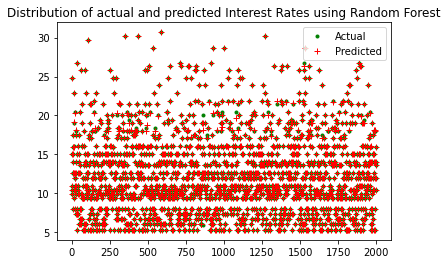

In [23]:
plt.plot(range(len(y_test)), y_test,'g.', label='Actual')
plt.plot(range(len(y_test)), predictions,'r+', label='Predicted')
plt.title('Distribution of actual and predicted Interest Rates using Random Forest')
plt.legend()
plt.show()

##### Observation: In the Random Forest model, we observe a 99.6% accuracy, 99.1% Explained variance score and 98.2% R2 Score. This model provides an extremely good result

##### XGBoost Regressor

XGBoost Regressor is used with 500 estimators and evaluation metric of root mean square error

In [24]:
model = XGBRegressor(n_estimators=500, random_state=42)

eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["rmse"]

%time model.fit(x_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

Wall time: 2.91 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# final model assessment
pred_test = np.floor(model.predict(x_test))
pred_train = np.floor(model.predict(x_train))

In [26]:
print('R2 Score: ', r2_score(y_test, pred_test))
print('Explained variance score: ',explained_variance_score(y_test,pred_test))
print('Accuracy score: ',accuracy_score(np.floor(y_test), np.floor(pred_test)))

R2 Score:  0.9821533642410016
Explained variance score:  0.9919166239280924
Accuracy score:  0.9865


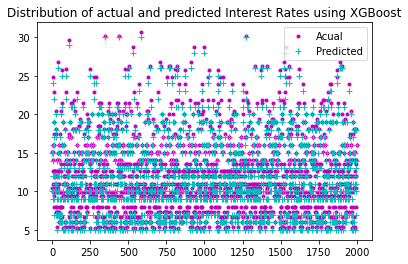

In [27]:
plt.plot(range(len(y_test)), y_test,'m.', label='Acual')
plt.plot(range(len(y_test)), pred_test,'c+', label='Predicted')
plt.title('Distribution of actual and predicted Interest Rates using XGBoost')
plt.legend()
plt.show()

##### Observation: In the XGBoost model, we observe a 98.6% accuracy, 99.1% Explained variance score and 98.2% R2 Score. This model provides an extremely good result as well.

#### Thus we conclude that both the models employed here, Random Forest and XGBoost provide extremely good accuracies, explained variance scores and R2 scores. We have used explained variance scores and R2 scores because regression models have been used as the predictor variable is continuous and not discrete